# LAB 2: Image Sculpting

Implement histogram‑based enhancement plus linear & non‑linear filtering. You’ll build a few things from scratch, then compare with OpenCV’s optimized ops.


---

**Learning goals**



*   Read/visualize images and histograms; apply equalization (global & CLAHE).
*   Implement 2‑D convolution from scratch (padding, stride=1) and use it for blur, sharpen, and edges.
*   Use OpenCV filters (Gaussian, Median, Bilateral, filter2D) and compare results/speed.


---

**Pre-requisite**

* Python: ```pip install numpy opencv-python matplotlib```


> [Image Used can be downloaded here!](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.magzter.com%2Fstories%2Fyoung-adult%2FThe-Teenager-Today%2FGEOFFREY-HINTON-THE-GODFATHER-OF-ARTIFICIAL-INTELLIGENCE%3Fsrsltid%3DAfmBOorg5v4yfHciLKzOgo8qXbYfw_tDr9wc365XMdC4bmsI758g_Jx9&psig=AOvVaw0GuNXHeywiM56eS1PmC7Pa&ust=1755093291089000&source=images&cd=vfe&opi=89978449&ved=0CBUQjRxqFwoTCOCmrZm2hY8DFQAAAAAdAAAAABAY)

Save it as ```GEOFFREY-HINTON-POTRAIT.jpg```

## PART A - Histogram Analysis & Equalization

### A1. Load + visualize histogram

In [3]:
import cv2, numpy as np, matplotlib.pyplot as plt

In [4]:
img_path_color = './GEOFFREY-HINTON-POTRAIT.jpg'

In [5]:
img_color = cv2.imread(img_path_color, cv2.IMREAD_COLOR)  # BGR

assert img_color is not None, "Color Image not found. Check the path."

In [6]:
imgRGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

(np.float64(-0.5), np.float64(844.5), np.float64(639.5), np.float64(-0.5))

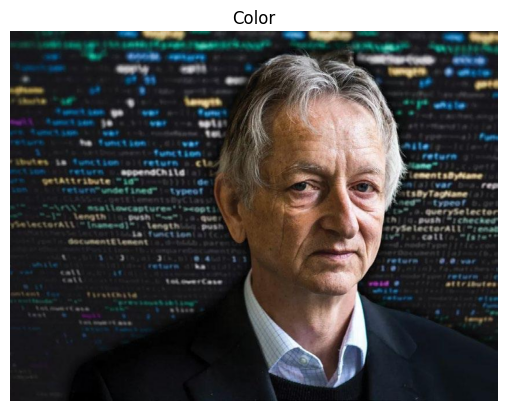

In [7]:
plt.figure(); plt.imshow(imgRGB); plt.title('Color'); plt.axis('off')

How does the Histogram works?

> Plot of No. of pixels vs Pixel Intensity

opencv function of histogram cal.

`hist = cv2.calcHist([image], [i], None, [num_bins], [0, 256])`

Parameters:

* images: list of images as numpy arrays. All images must be of the same dtype and same size.
* channels: list of the channels used to calculate the histograms.
* mask: optional mask (8 bit array) of the same size as the input image.
* histSize: histogram sizes in each dimension
* ranges: Array of the dims arrays of the histogram bin boundaries in each dimension

### Lets plot the histograms

In [8]:
colors = ['r', 'g', 'b']
plt.figure(figsize=(12, 4))
for i in range(len(colors)):
    hist = cv2.calcHist([imgRGB], [i], None, )
    plt.plot(hist, color=colors[i], label=f'{colors[i]} channel')
plt.title('Color Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()



error: OpenCV(4.12.0) :-1: error: (-5:Bad argument) in function 'calcHist'
> Overload resolution failed:
>  - calcHist() missing required argument 'histSize' (pos 4)
>  - calcHist() missing required argument 'histSize' (pos 4)


<Figure size 1200x400 with 0 Axes>

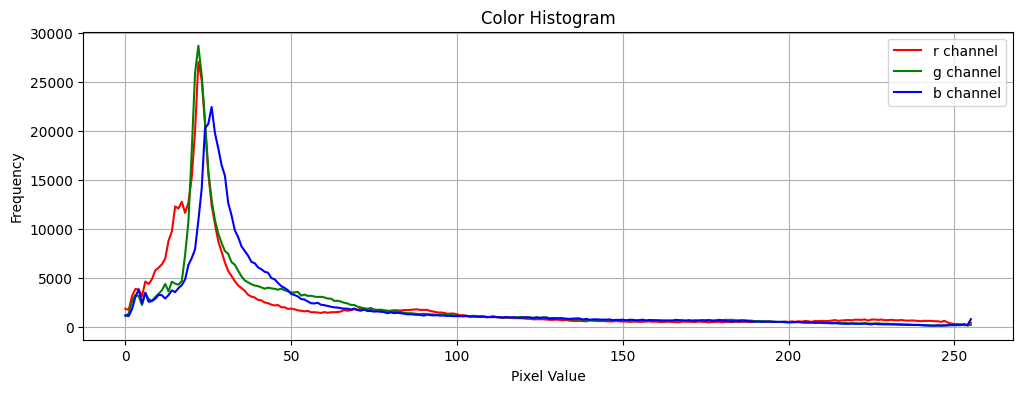

In [ ]:
import cv2
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b']
plt.figure(figsize=(12, 4))

for i, col in enumerate(colors):
    hist = cv2.calcHist([imgRGB], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=f'{col} channel')

plt.title('Color Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

#mean value...
#from the pic >> low brightness level
#difference in mean >> 


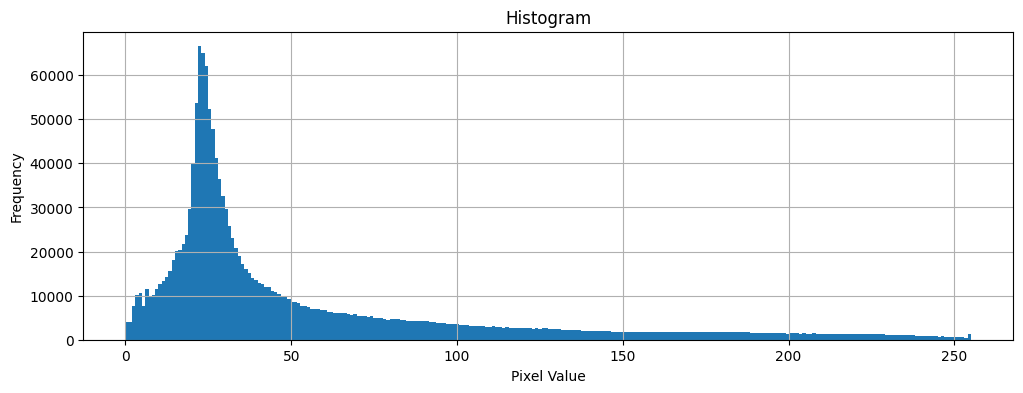

In [11]:
plt.figure(figsize=(12, 4))
plt.hist(imgRGB.ravel(), bins=256, range=(0, 255))     # matplotlib histogram  -- problem: you cant plot for each channels
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#hist function to plot histogram for each channel

In [12]:
# Convert to gray scale - 1 channel
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

(np.float64(-0.5), np.float64(844.5), np.float64(639.5), np.float64(-0.5))

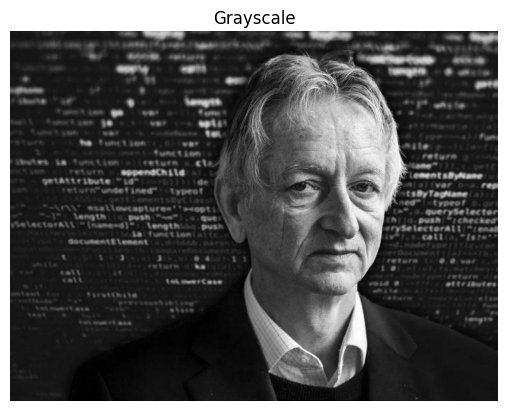

In [13]:
plt.figure(); plt.imshow(img_gray, cmap='gray'); plt.title('Grayscale'); plt.axis('off')

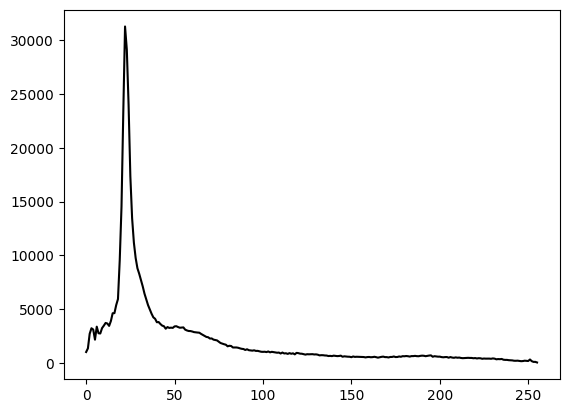

In [15]:
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
plt.plot(hist, color='k', label='Grayscale channel')

#using o [0] for gray scale

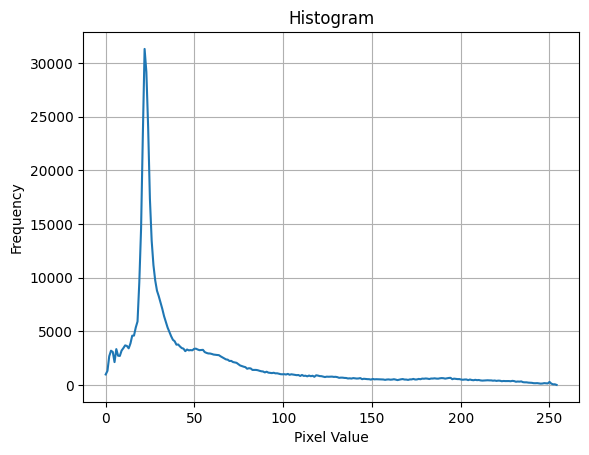

In [16]:
hist_counts, bin_edges = np.histogram(img_gray.ravel(), bins=256, range=(0, 255))  # Numpy histogram function
plt.figure()
plt.plot(bin_edges[:-1], hist_counts)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Lets plot histogram of Color and Gray Scale image side by side

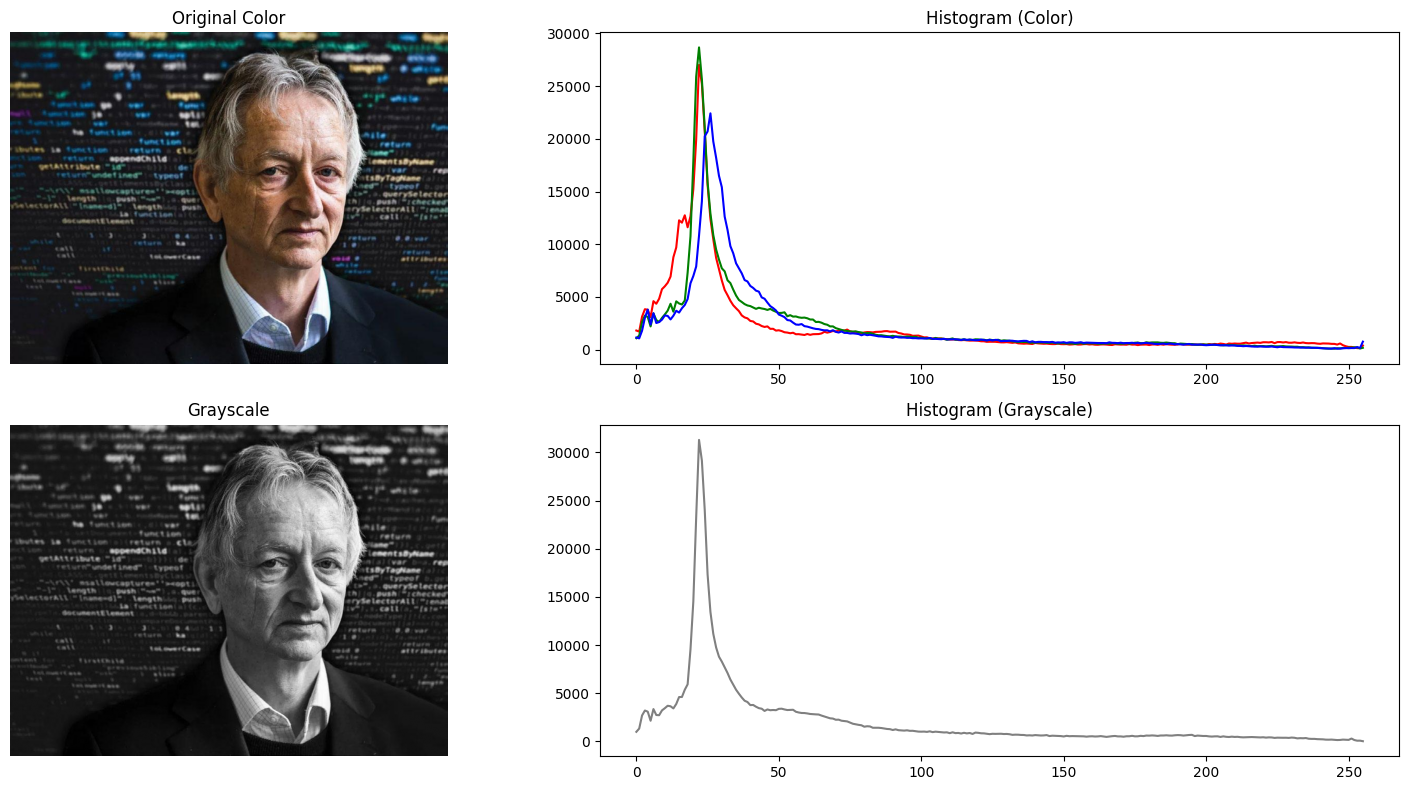

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# Original grayscale image
axs[0, 0].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Color')
axs[0, 0].axis('off')

# Histogram of original image
for i in range(len(colors)):
    hist = cv2.calcHist([imgRGB], [i], None, [256], [0, 256])
    axs[0, 1].plot(hist, color=colors[i], label=f'{colors[i]} channel')
axs[0, 1].set_title('Histogram (Color)')

# Equalized grayscale image
axs[1, 0].imshow(img_gray, cmap='gray')
axs[1, 0].set_title('Grayscale')
axs[1, 0].axis('off')

# Histogram of equalized image
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
axs[1, 1].plot(hist, color='gray')
axs[1, 1].set_title('Histogram (Grayscale)')

plt.tight_layout()
plt.show()

## Task-1: Describe in 2–3 sentences what the histogram tells you (under/over‑exposed? low contrast?).

### Your answer here!! Mean variance  (low)

The histogram is right-skewed: most pixel intensities are clustered on the left (darker values) with a long tail extending toward the right (brighter values). This indicates the image is under-exposed/dark overall. The spike is relatively narrow and not spread across the full 0–255 range, so the image also shows low contrast with limited tonal variation. There are no major gaps or combing patterns, which means the image has not undergone heavy quantization or processing.



Hints:

* A right-skewed histogram ⇒ underexposed/dark image; left-skewed ⇒ overexposed/bright.
* A narrow spike (concentrated bins) ⇒ low contrast; a wide spread across 0–255 ⇒ higher contrast.
* Gaps or combing often indicate prior quantization or heavy processing.  (quantised)

The histograms show that most pixel intensities are concentrated in the darker range (left side, around 20–50), with a sharp peak and very few pixels in the brighter region. This indicates the image is somewhat under-exposed and low contrast, since it lacks strong highlights and midtone distribution. The grayscale histogram confirms the same trend, showing the majority of pixels clustered at low intensity values.

The histograms are **left-skewed**, showing that most pixel intensities lie in the darker range, which indicates the image is somewhat **under-exposed**. The peaks are concentrated in a relatively narrow band rather than spread widely across the full 0–255 range, suggesting **low contrast** with limited tonal variation. The absence of significant gaps or combing implies the image has not undergone heavy quantization or processing.



## A2. Global histogram equalization

> Histogram equalization is method to redistribute pixel intensities so that all intensities are equally distributed

Helps to:

* Image Enhancement 
* Contrast Enhancement

Image taken from: https://en.wikipedia.org/wiki/Histogram_equalization#/media/File:Unequalized_Hawkes_Bay_NZ.jpg

In [19]:
bad_img = cv2.imread('./Unequalized_image.jpg', cv2.IMREAD_GRAYSCALE)
assert bad_img is not None, "Bad Image not found. Check the path."

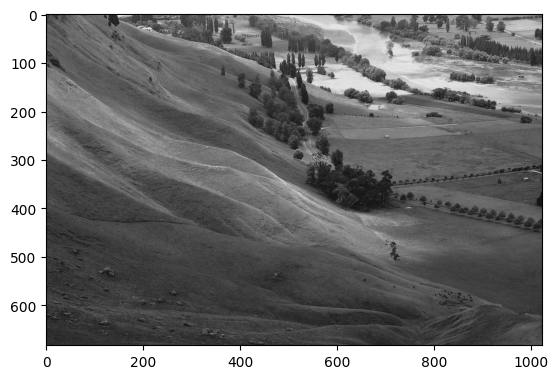

In [20]:
plt.imshow(bad_img, cmap='gray')

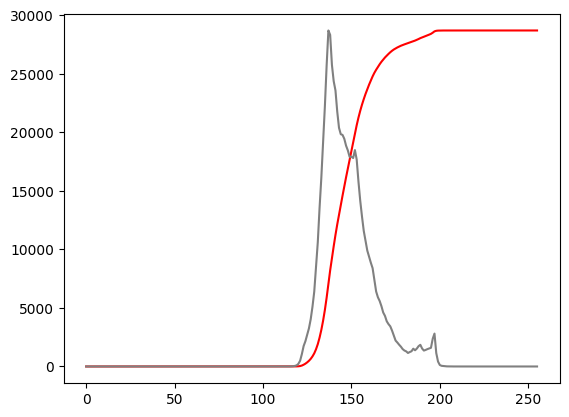

In [21]:
hist = cv2.calcHist([bad_img], [0], None, [256], [0, 256])

# Lets calculate the cdf
cdf = hist.cumsum()

# Normalize CDF for plotting
cdfNorm = cdf * hist.max() / cdf.max()

plt.plot(cdfNorm, color='red')
plt.plot(hist, color='gray')   

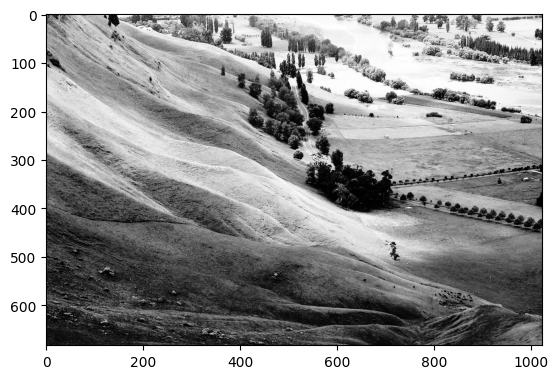

In [23]:
# Use cv2.equalizeHist for histogram equalization.
eq = cv2.equalizeHist(bad_img)
plt.imshow(eq, cmap='gray')

### Visualize the histogram after equalization

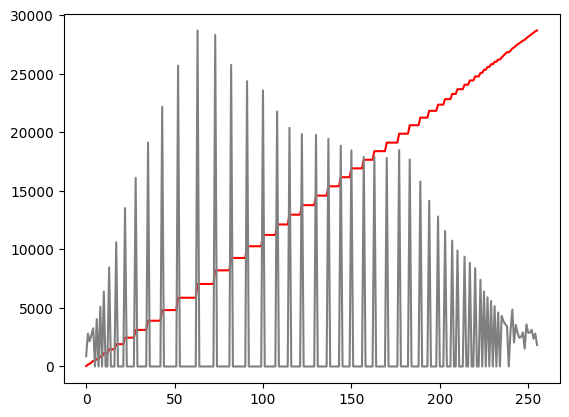

In [24]:
hist_eq = cv2.calcHist([eq], [0], None, [256], [0, 256])
cdf_eq = hist_eq.cumsum()
cdfNorm_eq = cdf_eq * hist_eq.max() / cdf.max()  # Normalize CDF for plotting
plt.plot(cdfNorm_eq, color='red')
plt.plot(hist_eq, color='gray')   

### Compare the orignal and equalized image side by side

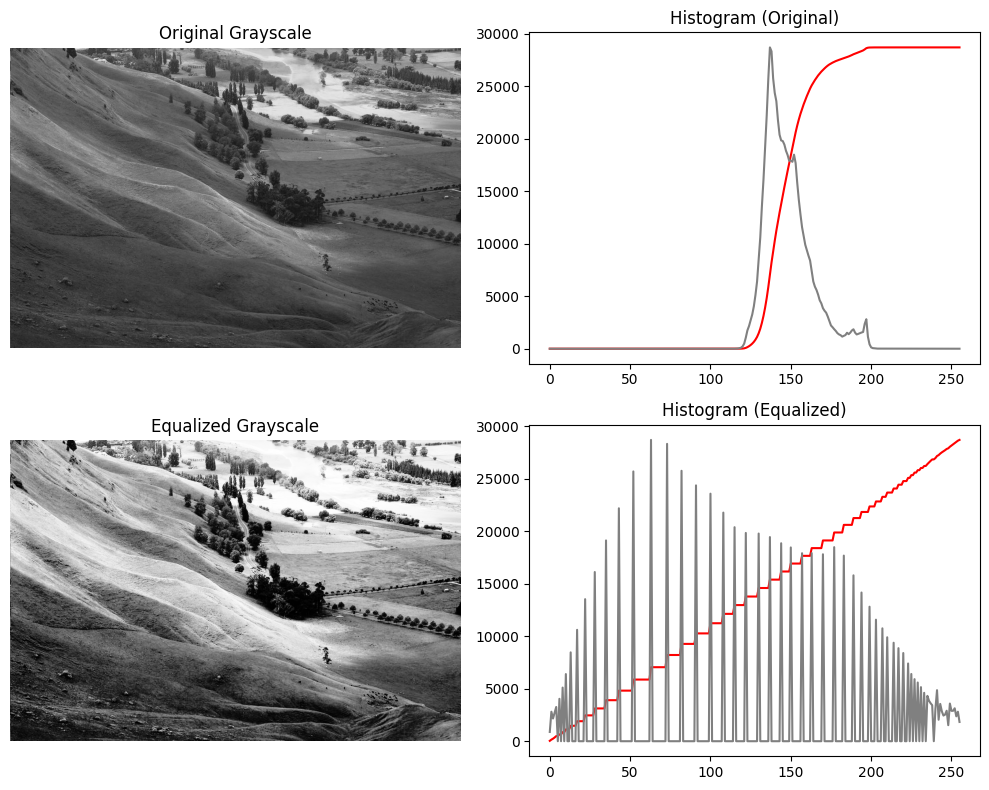

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Original grayscale image
axs[0, 0].imshow(bad_img, cmap='gray')
axs[0, 0].set_title('Original Grayscale')
axs[0, 0].axis('off')

# Histogram of original image
hist = cv2.calcHist([bad_img], [0], None, [256], [0, 256])
cdf = hist.cumsum()
cdfNorm = cdf * hist.max() / cdf.max()  # Normalize CDF for plotting
axs[0, 1].plot(cdfNorm, color='red')
axs[0, 1].plot(hist, color='gray')
axs[0, 1].set_title('Histogram (Original)')

# Equalized grayscale image
axs[1, 0].imshow(eq, cmap='gray')
axs[1, 0].set_title('Equalized Grayscale')
axs[1, 0].axis('off')

# Histogram of equalized image
hist_eq = cv2.calcHist([eq], [0], None, [256], [0, 256])
cdf_eq = hist_eq.cumsum()
cdf_eqNorm = cdf_eq * hist_eq.max() / cdf_eq.max()
axs[1, 1].plot(cdf_eqNorm, color='red')
axs[1, 1].plot(hist_eq, color='gray')
axs[1, 1].set_title('Histogram (Equalized)')

plt.tight_layout()
plt.show()

#contrast>>
#analogue to digital conversion (lose value of some intensity)


## Task-2: Compare before/after. When does equalization help vs. hurt (e.g., noise amplification)?


Histogram equalization helps in cases like the original image here, where the histogram is narrowly concentrated in the mid-range, leading to low global contrast. After equalization, the intensities are spread more uniformly across 0–255, making details in the landscape (slopes, trees, fields) stand out more clearly.

However, equalization can hurt when the image has uneven lighting or significant noise — in such cases, it amplifies noise in dark,flat regions and may create halos or an unnatural, harsh appearance. 

This means thatIn short, it’s great for dim/low-contrast images, but risky for already well-lit or noisy ones.



After the comparison, the equalisation helps in making sure the intensities are spread more uniformly (from original image : histogram_low global contrast), making details in landscapes.(eg: slopes , trees and fields stand out more clearly.) 
However, equalization can hurt when the image has uneven lighting or significant noise — in such cases, it amplifies noise in dark,flat regions and may create halos or an unnatural, harsh appearance.Thus, it is great for dim/low-contrast images, but risky for already well-lit or noisy ones.

Hints:

* Helps when the global contrast is low (e.g., dim scene): midtones expand, details pop.
* Hurts when there’s nonuniform lighting or noise: it boosts noise in dark/flat regions and may produce halos or unnatural look.
* Expect more uniform histogram spread post-HE; local textures may look harsher.


## A3. Contrast Limited Adaptive Histogram Equalization (CLAHE)

Helps:

* Enhancing Local Contrast

Steps:

* Image is divided into small tiles or blocks.
* Histogram is calculated for each tile.
* If histogram bin is above specified clipLimit, those pixels are clipped and contrast of tile is limited.
* The clipped excess are redistributed uniformly to other bins before applying histogram equalization.
* Histogram Eq. is applied to each tile.
* Final image obtained by interpolating the equalized tiles.

In [26]:
# Use cv2.createCLAHE for contrast limited adaptive histogram equalization and apply it to the grayscale image

clahe = cv2.createCLAHE()
clahe_img = clahe.apply(bad_img)

In [32]:
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))  # clipLimit controls contrast, tileGridSize controls tile size
clahe_img = clahe.apply(bad_img)
# ...existing code...

#increase titles >>the more equalised , given cliplimit
#cliplimit from 2.0 to 1.0 so that it is not overcomposed

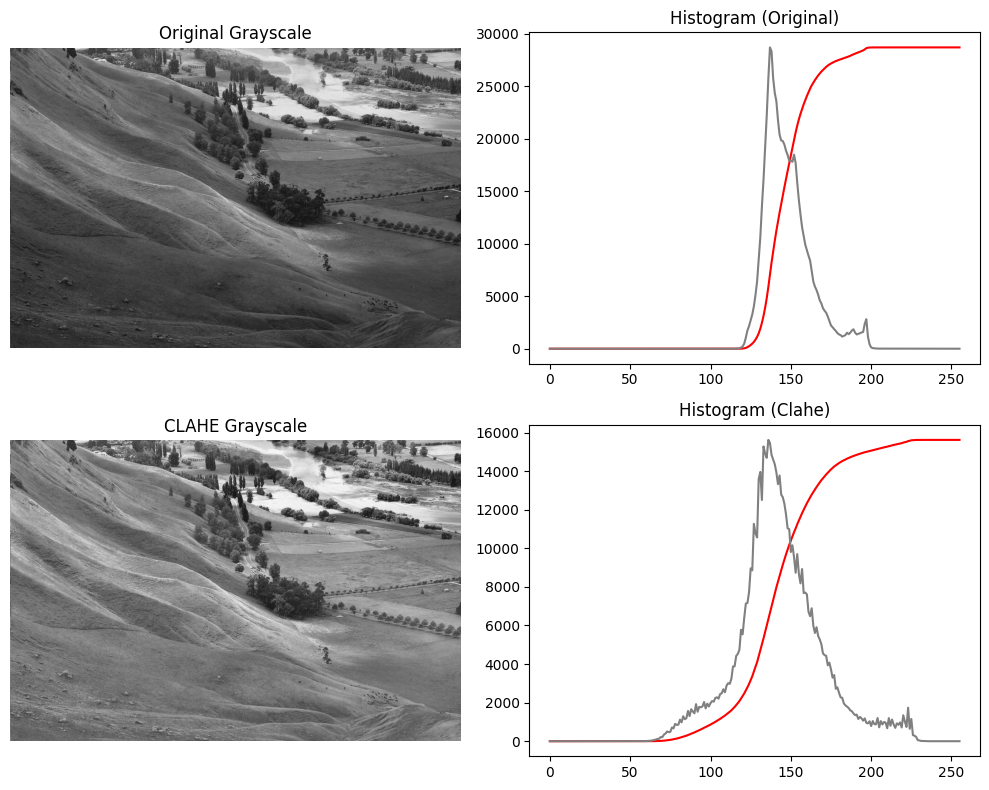

In [31]:
# Plot the original image, its histogram and Clahe image and its histogram to compare!

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Original grayscale image
axs[0, 0].imshow(bad_img, cmap='gray')
axs[0, 0].set_title('Original Grayscale')
axs[0, 0].axis('off')

# Histogram of original image
hist = cv2.calcHist([bad_img], [0], None, [256], [0, 256])
cdf = hist.cumsum()
cdfNorm = cdf * hist.max() / cdf.max()  # Normalize CDF for plotting
axs[0, 1].plot(cdfNorm, color='red')
axs[0, 1].plot(hist, color='gray')
axs[0, 1].set_title('Histogram (Original)')

# CLAHE grayscale image
axs[1, 0].imshow(clahe_img, cmap='gray')
axs[1, 0].set_title('CLAHE Grayscale')
axs[1, 0].axis('off')

# Histogram of equalized image
hist_clahe = cv2.calcHist([clahe_img], [0], None, [256], [0, 256])
cdf_clahe = hist_clahe.cumsum()
cdf_claheNorm = cdf_clahe * hist_clahe.max() / cdf_clahe.max()
axs[1, 1].plot(cdf_claheNorm, color='red')
axs[1, 1].plot(hist_clahe, color='gray')
axs[1, 1].set_title('Histogram (Clahe)')

plt.tight_layout()
plt.show()

## Task-3: Task: Try clipLimit = 2.0, 8.0. Note artifacts vs. local contrast.

With clipLimit = 2.0, CLAHE produces a balanced result: local contrast is noticeably improved while keeping noise amplification low, making it a good default. Increasing to clipLimit = 8.0 gives much stronger contrast enhancement, but it can also introduce artifacts such as patchy textures and amplified noise in flat regions. Thus, higher clip limits boost detail but risk unnatural appearance.


In [32]:
# Plot the CLAHE histograms with clipLimit 2 and 8 and compare it with the orignal and clipLimit 4.

> Explain what differences you notice here!!

Hints:

* clipLimit ↓ (e.g., 1.0): Conservative; fewer artifacts; milder contrast gain.

* clipLimit moderate (≈2.0): Good local contrast without heavy noise blow-up (common default).

* clipLimit ↑ (≥4.0): Strong local contrast but also stronger noise and possible “patchy” tiles if tileGridSize is small.

* CLAHE mitigates HE’s noise problem by limiting amplification within tiles and then blending.

# Part B - Convolution From Scratch

## 2D Convolution (Image Filtering)

As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.

### Implement 2‑D convolution

**Function** `conv2d(image, kernel)`

1. **Get kernel size and padding**  
   - `k ← number of rows in kernel`  
   - `pad ← floor(k / 2)`

2. **Pad the image**  
   - `padded_image ← pad image by 'pad' pixels on all sides using reflection padding`

3. **Prepare output image**  
   - `output ← matrix of zeros with same height & width as image`

4. **Flip kernel for true convolution**  
   - `flipped_kernel ← flip kernel horizontally, then flip vertically`

5. **For each pixel (i, j) in the original image**  
   - **Loop** `i` from `0` to `image_height - 1`  
     - **Loop** `j` from `0` to `image_width - 1`  
       - `region ← extract k × k patch from padded_image starting at (i, j)`  
       - `value ← sum(region * flipped_kernel)`  
       - `output[i, j] ← value`

6. **Clip values to valid range**  
   - `output ← clip all values to [0, 255]`

7. **Convert to unsigned 8-bit integer**  
   - `output ← convert output to uint8 type`

8. **Return**  
   - `return output`


In [40]:
import numpy as np

def conv2d(image, kernel):
    # image: HxW (grayscale), kernel: kxk
    k = kernel.shape[0]                                                 # Size of kernel (assumed square)
    pad = k // 2                                                        # Number of pixels to pad on each side
    padded = np.pad(image, ((pad,pad),(pad,pad)), mode='reflect')       # Pad the image

    # Creates an empty output image (same size as original).
    output = np.zeros_like(image, dtype=np.float32)
    

    # --------------Convolution--------------------

    # Convolution (mathematically) requires flipping the kernel horizontally and vertically before applying it.
    # If you skip this, you’re doing cross-correlation, not convolution.
    kflip = np.flipud(np.fliplr(kernel)).astype(np.float32)

    for i in range(image.shape[0]):                     # Loop over rows
        for j in range(image.shape[1]):                 # Loop over columns
            # Extract local patch (region) from padded image
            patch = padded[i:i+k, j:j+k]
            # Multiply + sum → convolution result
            value = np.sum(patch * kflip)
            output[i, j] = value


            # Multiply + sum → convolution result


    return np.clip(output, 0, 255).astype(np.uint8)        # np.clip → ensures pixel values stay in [0, 255].


If the kernel is ```3x3```, ```pad``` = 1.

Padding is needed so the output image has the same size as the input.

```np.pad``` adds pixels around the image.

```mode='reflect'``` means the border pixels are mirrored (reduces border artifacts compared to zero-padding).

eg: [1 2 3] → pad=1 → [2 1 2 3 2]

In [34]:
img_gray.shape

(640, 845)

## Averaging (Blurring)
# Define kernel
# Box filter (3x3)

box3 = np.ones((3, 3), dtype=np.float32) / 9

In [ ]:
# Define kernel
# Box filter (3x3)

box3 = np.ones((3, 3), dtype=np.float32) / 9.0

A 3×3 averaging filter.

All elements are 1/9 so the sum is 1.

When convolved, it replaces each pixel with the average of its 3×3 neighborhood.

Effect: Smooths/softens the image, reducing noise but also blurring edges.

## Sharpening

In [53]:
# Define kernels
# Sharpening filter

sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]], dtype=np.float32)

In [ ]:
#sharpen = np.array([[-1, 0, -1],
                    #[0, 5, 0],
                    #[-1, 0, -1]], dtype=np.float32)

Central pixel weight = 5 (emphasizes it),
neighbors = -1 (subtracts them).

Effect: Enhances edges and fine details by amplifying differences between the center pixel and its neighbors.

## Sobel Filter ( Detecting vertical and horizontal)

In [ ]:
# Define kernels    
# Sobel filter to find the vertical edges

sobel_vertical = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]], dtype=np.float32)

#255 lighter >> if the value increases, the pixel becomes lighter
#0 blacker >> if the value decreases, the pixel becomes darker

Detects horizontal changes in pixel intensity (vertical edges in the image).

Large positive values = transition from dark → light;
large negative values = light → dark.

In [44]:
blurred = conv2d(img_gray, box3)
sharpened = conv2d(img_gray, sharpen)
edges_x = conv2d(img_gray, sobel_vertical)

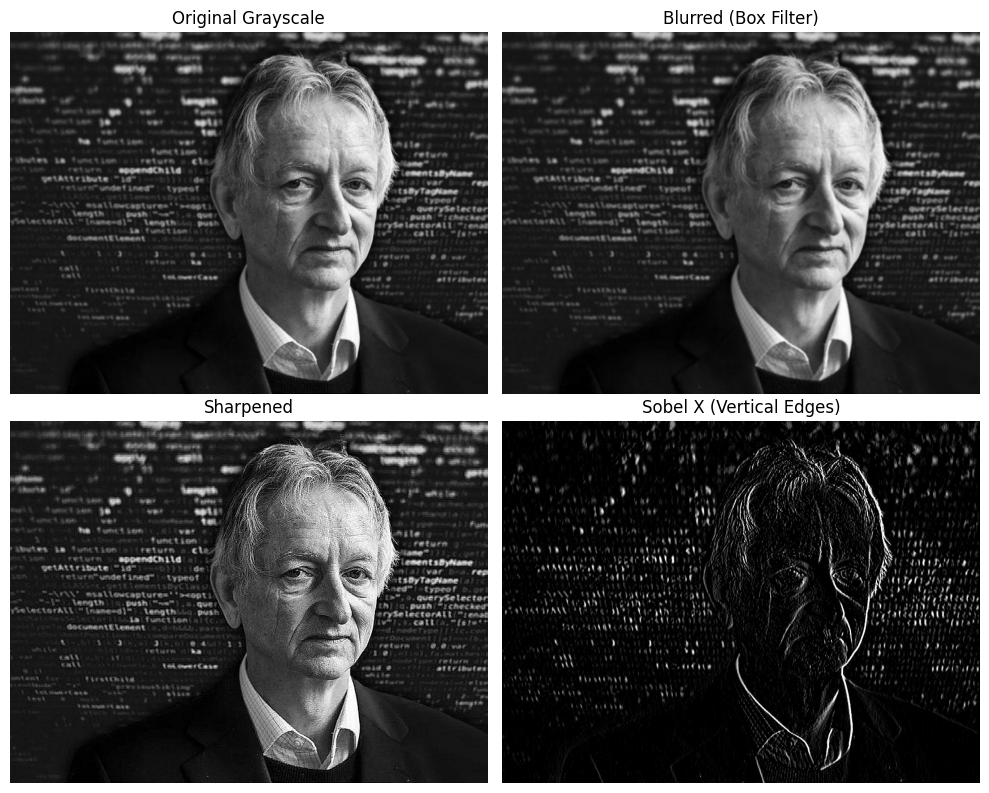

In [45]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Original grayscale image
axs[0, 0].imshow(img_gray, cmap='gray')
axs[0, 0].set_title('Original Grayscale')
axs[0, 0].axis('off')

# Blurred image
axs[0, 1].imshow(blurred, cmap='gray')
axs[0, 1].set_title('Blurred (Box Filter)')
axs[0, 1].axis('off')

# Sharpened image
axs[1, 0].imshow(sharpened, cmap='gray')
axs[1, 0].set_title('Sharpened')
axs[1, 0].axis('off')

# Sobel X edges
axs[1, 1].imshow(edges_x, cmap='gray')
axs[1, 1].set_title('Sobel X (Vertical Edges)')
axs[1, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## Task:

Explain what each kernel does (low‑pass, high‑boost, derivative).

Visual check: where do edges respond most?

### Your answer here!!

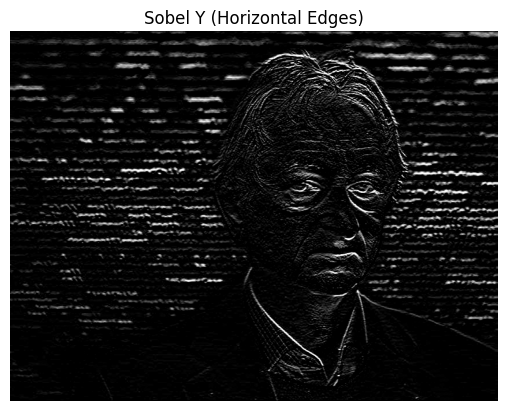

In [54]:
# Define a sobel filter for detecting the horizontal edges.
# --- Your code goes here ---


# Use this filter as a kernel for the convolution with orignal image
# --- Your code goes here ---

# Display the image
# --- Your code goes here ---

# Define a sobel filter for detecting the horizontal edges.
sobel_horizontal = np.array([[1, 2, 1],
                             [0, 0, 0],
                             [-1, -2, -1]], dtype=np.float32)

# Use this filter as a kernel for the convolution with original image
edges_y = conv2d(img_gray, sobel_horizontal)

# Display the image
plt.figure()
plt.imshow(edges_y, cmap='gray')
plt.title('Sobel Y (Horizontal Edges)')
plt.axis('off')
plt.show()

## Compare to opencv ```filter2D```

In [57]:
cv_blurred = cv2.filter2D(img_gray, -1, box3, borderType=cv2.BORDER_REFLECT)
diff = cv2.absdiff(blurred, cv_blurred)
print('Mean abs diff:', diff.mean())

Mean abs diff: 0.4352440828402367


Small but nonzero differences are expected. Causes:

* Border handling: reflect vs replicate vs constant changes edge pixels.

* Kernel flip: True convolution flips the kernel; filter2D does correlation unless you flip—mismatch yields differences.

* Rounding/precision: Float vs uint8 rounding and saturation.

# Part C — Filtering with OpenCV’s Optimized Functions


OpenCV provides a function cv.filter2D() to convolve a kernel with an image.

Reference: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

# Image Blurring (Image Smoothening)

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges).

- We will discuss 3 different main types of blurring technique provided by the OpenCV. Lets First Visualize them!!

### 1. Averaging
- This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element.

### 2. Median blurring
- Here, the function `cv.medianBlur()` takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

### 3. Gaussian blurring
- In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, `cv.GaussianBlur()`. We should specify the width and height of the kernel which should be positive and odd

- Parameters guide: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed

Reference: https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

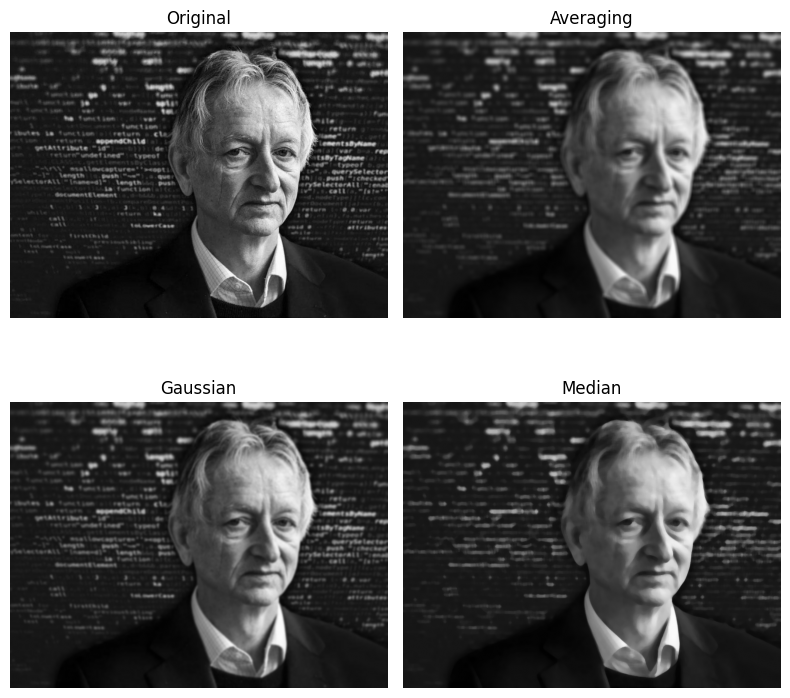

In [67]:
kernel_size = 9

blur = cv2.blur(img_gray, (kernel_size, kernel_size))
gaussian = cv2.GaussianBlur(img_gray, (kernel_size, kernel_size), sigmaX=0)
median = cv2.medianBlur(img_gray, kernel_size)

titles  = ['Original', 'Averaging', 'Gaussian', 'Median']
images  = [img_gray, blur, gaussian, median]

plt.figure(figsize=(8, 8))
for i, (title, im) in enumerate(zip(titles, images), start=1):
    ax = plt.subplot(2, 2, i)
    ax.imshow(im, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

#which one is a linear filter? > the median filter is non-linear, while averaging and Gaussian are linear filters

## Averaging

Averaging, also known as mean blurring, computes the average of all the pixel values within the kernel and replaces the central pixel with this average.
This results in smoothing the image but can cause loss of detail.

The key parameter is the size of the kernel (e.g., (3,3), (5,5)) that determines the level of smoothing.

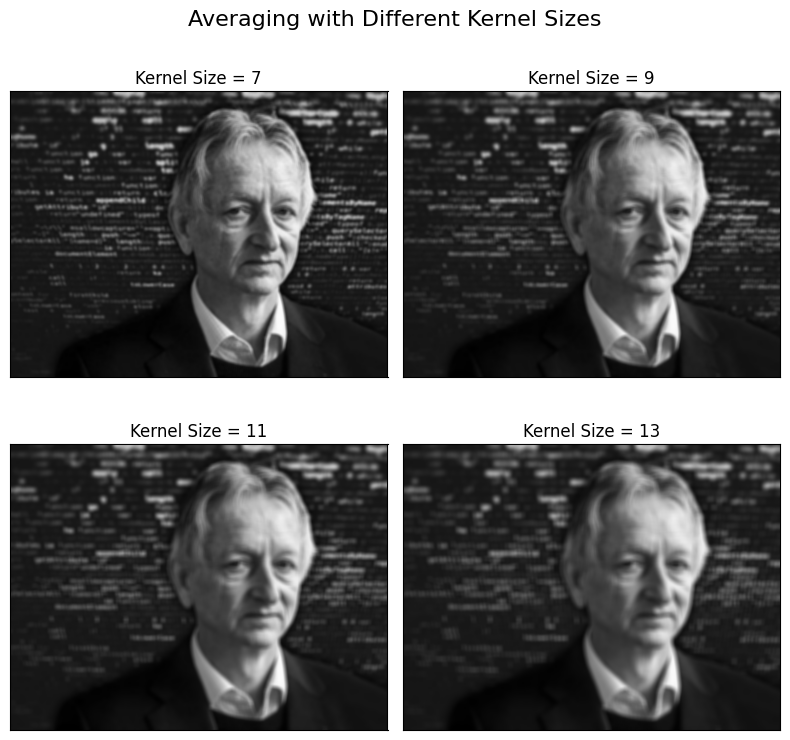

In [69]:
kernel_sizes = [7,9,11,13]
plt.figure(figsize=(8, 8))
plt.suptitle('Averaging with Different Kernel Sizes', fontsize=16)

for i, k in enumerate(kernel_sizes):
    blur = cv2.blur(img_gray, (k, k),3)
    plt.subplot(2, 2, i + 1)
    plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
    plt.title(f'Kernel Size = {k}')
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


#kernel size increases blur increases

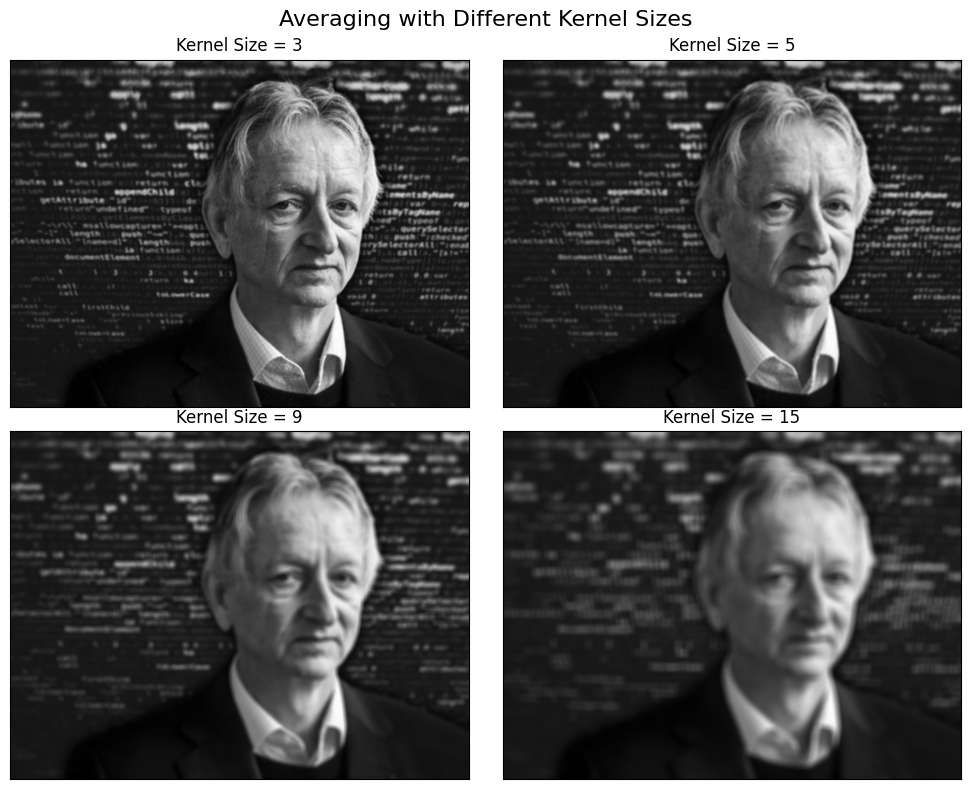

In [ ]:
kernel_sizes = [3, 5, 9, 15]  # Example kernel sizes

plt.figure(figsize=(10, 8))
plt.suptitle('Averaging with Different Kernel Sizes', fontsize=16)

for i, k in enumerate(kernel_sizes):
    blur = cv2.blur(img_gray, (k, k),3)
    plt.subplot(2, 2, i + 1)
    plt.imshow(blur, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Kernel Size = {k}')
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# As kernel size increases, the image becomes more

## Median Blurring

Median Blurring replaces the central pixel in the kernel with the median of all the pixel values in the kernel.
It is effective at removing "salt-and-pepper" noise from images.

The key parameter for median blur is the size of the kernel, which must always be an odd number.


In [61]:
kernel_sizes = []
plt.figure(figsize=(8, 8))
plt.suptitle('Median Blurring with Different Kernel Sizes', fontsize=16)

for i, k in enumerate(kernel_sizes):
    median = cv2.medianBlur(img_gray, k)
    plt.subplot(2, 2, i + 1)
    plt.imshow(median, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Kernel Size = {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

## Gaussian blur (linear, separable)

## Gaussian Blur Parameters in OpenCV

**Function signature:**
```cv2.GaussianBlur(src, ksize, sigmaX, sigmaY=None, borderType=None)```


**ksize — Kernel Size**

Type: Tuple ```(width, height)``` — both values must be odd and > 0.

* Defines the spatial extent (hard cutoff) of the filter.

* Larger kernel → includes more neighboring pixels in the blur.

**sigmaX — Standard Deviation (X direction)**

* Controls how quickly weights fall off horizontally from the center pixel.

* Small σ → center pixel dominates → mild blur.

* Large σ → weights spread evenly → stronger blur.

* If sigmaX = 0, OpenCV computes it automatically from ksize.

**sigmaY — Standard Deviation (Y direction)**

* Controls how quickly weights fall off vertically.

* If sigmaY is None or 0, OpenCV sets sigmaY = sigmaX.

* Different values for sigmaX and sigmaY → anisotropic blur (more blur in one direction).

### Key Points
* Kernel size limits the maximum blur effect, even if σ is large.

* For large σ, increase ksize accordingly.  (2*pi*σ)

* (3, 3) with large σ will still only blur within its 3×3 neighborhood.

* sigmaX & sigmaY let you control blur strength independently in each axis.

In [62]:
kernel = []
plt.figure(figsize=(8, 8))
plt.suptitle('Effect of kernel size on Gaussian Blur', fontsize=16)

for i, k in enumerate(kernel):
    gaussian = cv2.GaussianBlur(img_gray, (k, k), 3)
    ax = plt.subplot(2, 2, i + 1)
    ax.imshow(gaussian, cmap='gray', vmin=0, vmax=255)
    ax.set_title(f'k = {k}')
    ax.axis('off')

plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

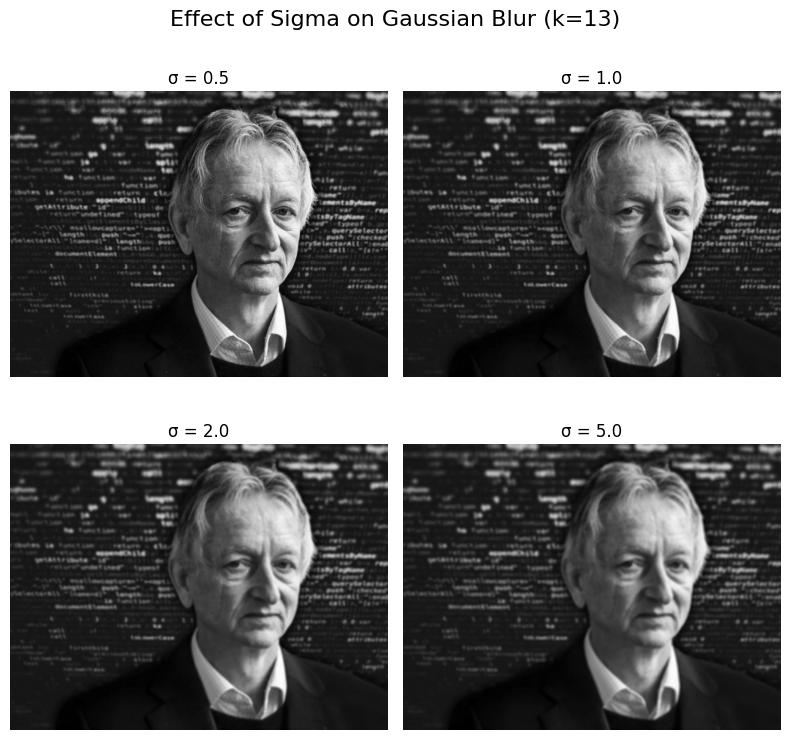

In [70]:
sigma_values = [0.5, 1.0, 2.0, 5.0]  # Example sigma values
plt.figure(figsize=(8, 8))
plt.suptitle('Effect of Sigma on Gaussian Blur (k=13)', fontsize=16)

for i, sigma in enumerate(sigma_values):
    gaussian = cv2.GaussianBlur(img_gray, (7, 7), sigma)
    ax = plt.subplot(2, 2, i + 1)
    ax.imshow(gaussian, cmap='gray', vmin=0, vmax=255)
    ax.set_title(f'σ = {sigma}')
    ax.axis('off')

plt.tight_layout()
plt.show()

### Lets add some noise to our image!!

### Introduce Salt and Pepper Noise

In [71]:
img_path_gray = './GEOFFREY-HINTON-POTRAIT.jpg'
img_gray = cv2.imread(img_path_gray, cv2.IMREAD_GRAYSCALE)
assert img_gray is not None, "file could not be read, check with os.path.exists"

# Parameters for salt & pepper noise
prob = 0.2  # Probability of noise

# Create a copy of the image
noisy_image = np.copy(img_gray)

# Apply salt & pepper noise
salt_pepper_noise = np.random.rand(img_gray.shape[0], img_gray.shape[1])

# Salt noise (white pixels)
noisy_image[salt_pepper_noise < prob / 2] = 255  # white in grayscale

# Pepper noise (black pixels)
noisy_image[salt_pepper_noise > 1 - prob / 2] = 0  # black in grayscale

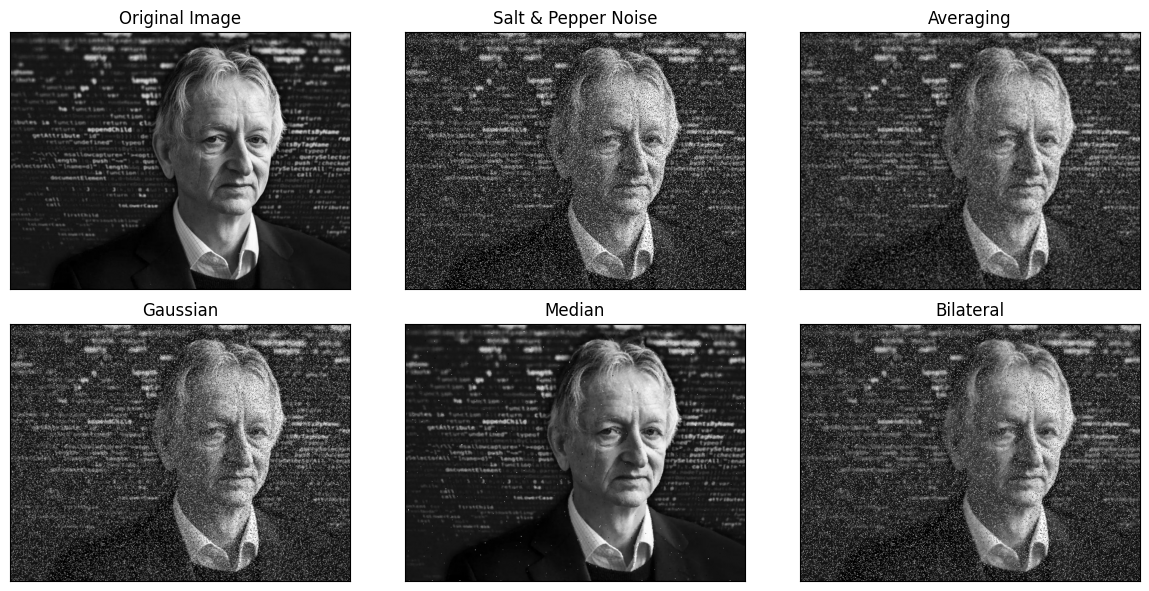

In [72]:
plt.figure(figsize=(12, 6))

# Filters
kernel_size = 3
blur = cv2.blur(noisy_image, (kernel_size, kernel_size))
gaussian = cv2.GaussianBlur(noisy_image, (kernel_size, kernel_size), 0.5)
median = cv2.medianBlur(noisy_image, kernel_size)
bilateral = cv2.bilateralFilter(noisy_image, 9, 75, 75)

# Titles and images
titles = ['Original Image', 'Salt & Pepper Noise', 'Averaging', 'Gaussian', 'Median', 'Bilateral']
images = [img_gray, noisy_image, blur, gaussian, median, bilateral]

for i in range(len(titles)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

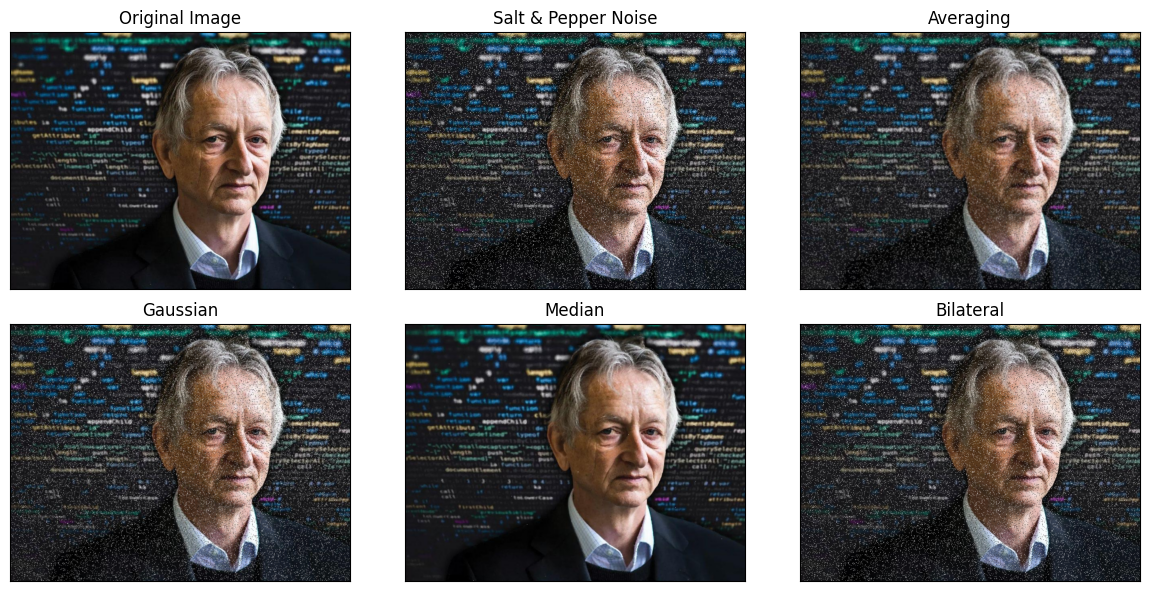

In [73]:
plt.figure(figsize=(12, 6))

img_color = './GEOFFREY-HINTON-POTRAIT.jpg'
img_color = cv2.imread(img_color)
assert img_color is not None, "file could not be read, check with os.path.exists"

# Convert from BGR (OpenCV) to RGB (Matplotlib)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Parameters for salt & pepper noise
prob = 0.1  # Probability of noise

# Create a copy of the image
noisy_image_color = np.copy(img_color)

# Apply salt & pepper noise
salt_pepper_noise = np.random.rand(img_color.shape[0], img_color.shape[1])

# Salt noise (white pixels)
noisy_image_color[salt_pepper_noise < prob / 2] = [255, 255, 255]  # white in grayscale

# Pepper noise (black pixels)
noisy_image_color[salt_pepper_noise > 1 - prob / 2] =  [0, 0, 0]  # black in grayscale

# Filters
kernel_size = 3
blur = cv2.blur(noisy_image_color, (kernel_size, kernel_size))
gaussian = cv2.GaussianBlur(noisy_image_color, (kernel_size, kernel_size), 0.5)
median = cv2.medianBlur(noisy_image_color, kernel_size)
bilateral = cv2.bilateralFilter(noisy_image_color, 9, 75, 75)

# Titles and images
titles = ['Original Image', 'Salt & Pepper Noise', 'Averaging', 'Gaussian', 'Median', 'Bilateral']
images = [img_color, noisy_image_color, blur, gaussian, median, bilateral]

for i in range(len(titles)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

### Introduce Gaussian Noise

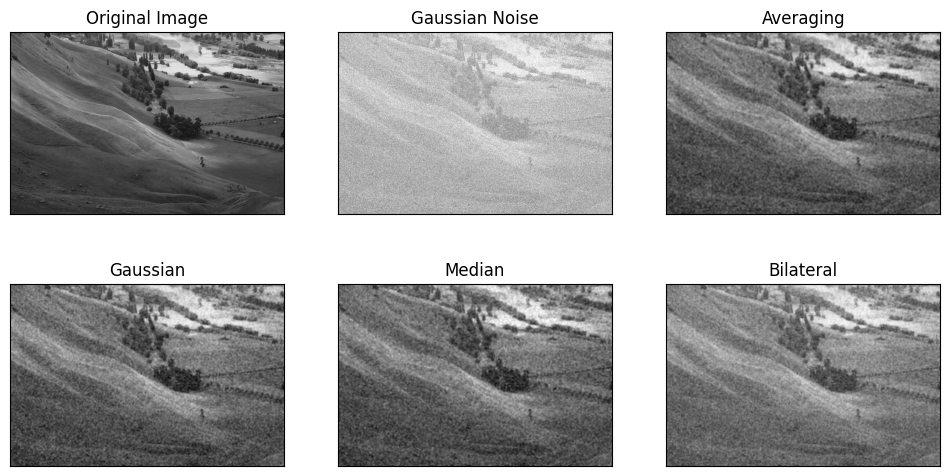

In [ ]:
# Generate Gaussian noise
mean = 50
std_dev = 30
gaussian_noise = np.random.normal(mean, std_dev, bad_img.shape)

# Convert to float to avoid overflow during the addition
image_float = bad_img.astype(np.float32)

# Add the gaussian noise to the image
noisy_image = image_float + gaussian_noise

# Clip the values to stay between valid range [0, 255]
noisy_image = np.clip(noisy_image, 0, 255)

# Convert back to unsigned 8-bit integer
noisy_image = noisy_image.astype(np.uint8)

kernel_size = 7
blur = cv2.blur(noisy_image,(kernel_size,kernel_size))
gaussian = cv2.GaussianBlur(noisy_image,(kernel_size,kernel_size),3)
median = cv2.medianBlur(noisy_image,kernel_size)
bilateral = cv2.bilateralFilter(noisy_image,9,75,75)

titles = ['Original Image','Gaussian Noise','Averaging','Gaussian','Median','Bilateral']
images = [bad_img, noisy_image, blur, gaussian, median, bilateral]

plt.figure(figsize=(12, 6))

for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


#to remove salt

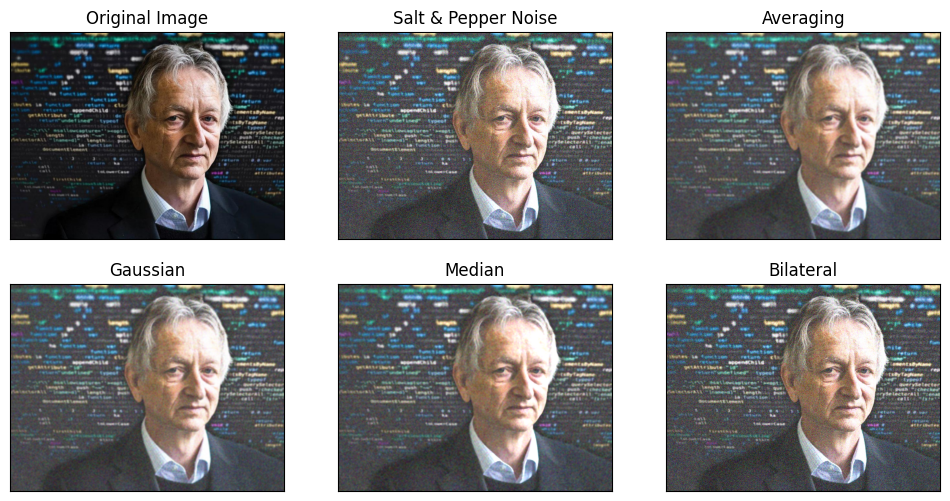

In [78]:
img_color = './GEOFFREY-HINTON-POTRAIT.jpg'
img_color = cv2.imread(img_color)
assert img_color is not None, "file could not be read, check with os.path.exists"

# Convert from BGR (OpenCV) to RGB (Matplotlib)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Generate Gaussian noise
mean = 50
std_dev = 30
gaussian_noise = np.random.normal(mean, std_dev, img_color.shape)

# Convert to float to avoid overflow during the addition
image_float = img_color.astype(np.float32)

# Add the gaussian noise to the image
noisy_image = image_float + gaussian_noise

# Clip the values to stay between valid range [0, 255]
noisy_image = np.clip(noisy_image, 0, 255)

# Convert back to unsigned 8-bit integer
noisy_image = noisy_image.astype(np.uint8)

kernel_size = 5
blur = cv2.blur(noisy_image,(kernel_size,kernel_size))
gaussian = cv2.GaussianBlur(noisy_image,(kernel_size,kernel_size),3)
median = cv2.medianBlur(noisy_image,kernel_size)
bilateral = cv2.bilateralFilter(noisy_image,3,25,170)

titles = ['Original Image','Salt & Pepper Noise','Averaging','Gaussian','Median','Bilateral']
images = [img_color, noisy_image, blur, gaussian, median, bilateral]

plt.figure(figsize=(12, 6))

for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


#to remove salt and pepper noise >> median filter is best

Which filtering operation do you think is more suitable for removing the Gaussian Noise??

> Hint: Since Gaussian noise has high-frequency variations, low-pass filters help reduce it.

https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html